In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import load_model
model = load_model('./training_models/NN_digit.h5')

Using TensorFlow backend.


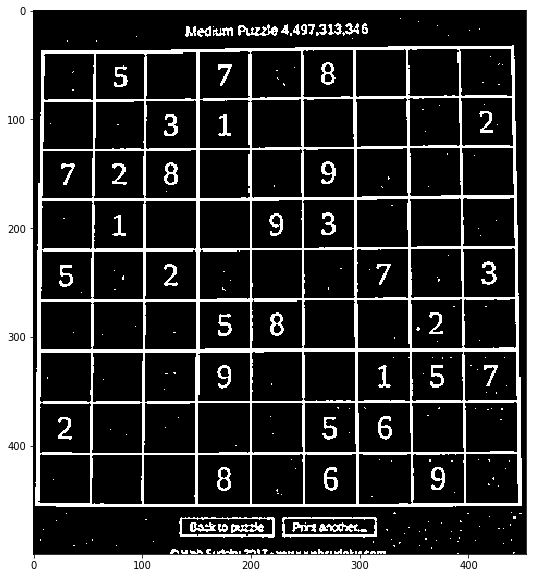

In [2]:
Points = np.load('./Points.npy')

img = cv2.imread('./Data/S_03.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

r, c = gray.shape
out_row = 500
gray = cv2.resize(gray, (int(out_row * float(c)/r), out_row))

gray = cv2.GaussianBlur(gray, (3, 3), 0)

im_th = cv2.adaptiveThreshold(gray, 255, 1, 1, 11, 2)

plt.figure(num =0, figsize=(10, 10))
plt.imshow(im_th, 'gray')
plt.show()

In [3]:
def find_biggest_contour(image):
    
    # Copy to prevent modification
    image = image.copy()
    contours, hierarchy = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    print len(contours)

    # Isolate largest contour
    try:
        contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours]
        biggest_contour = max(contour_sizes, key=lambda x: x[0])[1]
    except:
        biggest_contour = 0
        
    return biggest_contour

2
2
2
3
5
4
1
1
5
2
4
3
2
1
1
1
4
4
2
2
5
1
2


/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


3
3
3
2
2
5
1
1
3
2
2
1
4
2
3
1
5
1
3
3
3
2
1
1
1
3
4
1
2
4
5
3
3
5
4
3
1
3
7
9
2
3
3
2
3
3
4
3
5
2
2
0


error: /build/opencv-SviWsf/opencv-2.4.9.1+dfsg/modules/imgproc/src/contours.cpp:1904: error: (-215) contour.checkVector(2) >= 0 && (contour.depth() == CV_32F || contour.depth() == CV_32S) in function contourArea


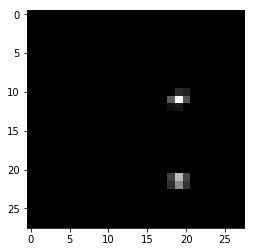

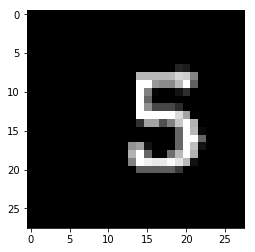

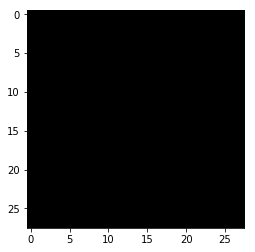

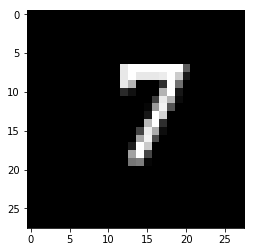

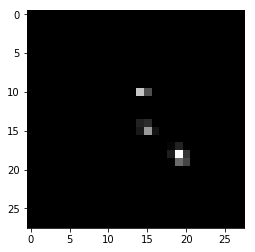

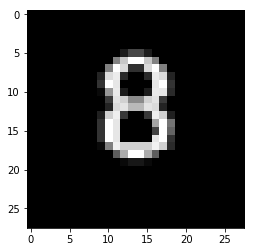

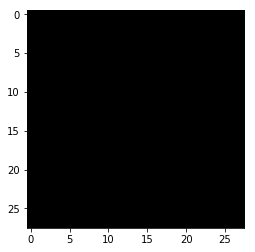

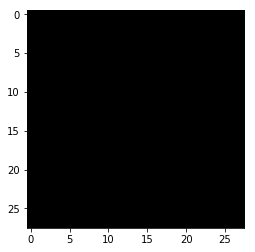

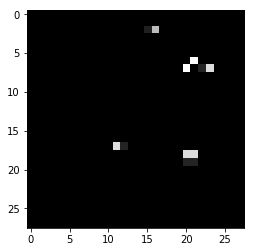

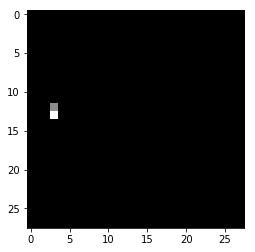

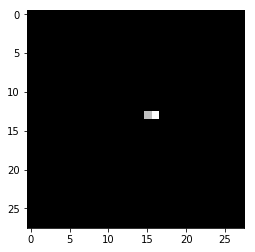

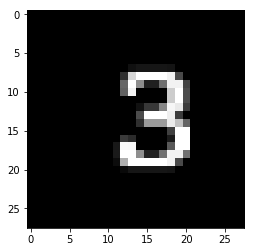

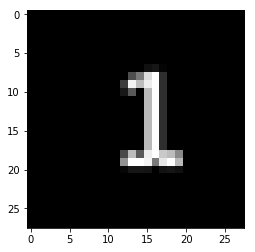

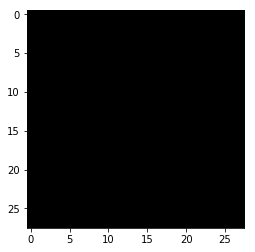

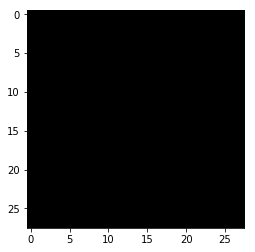

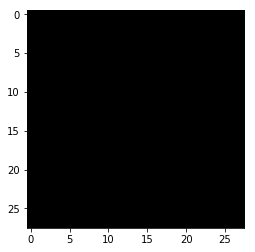

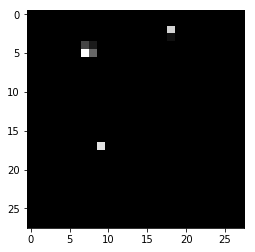

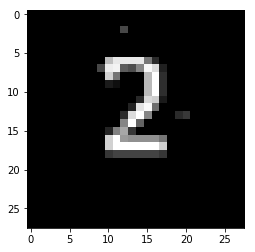

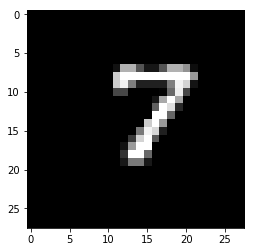

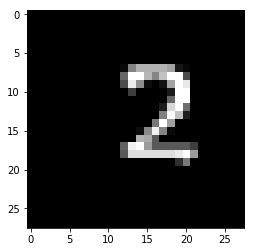

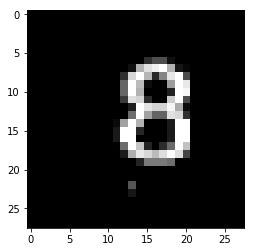

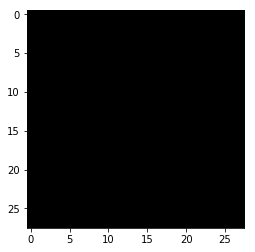

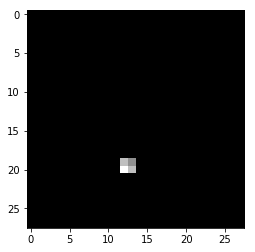

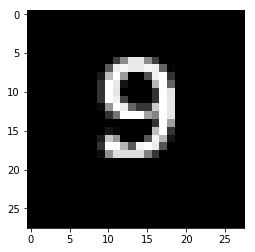

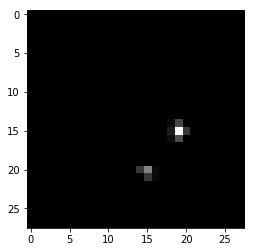

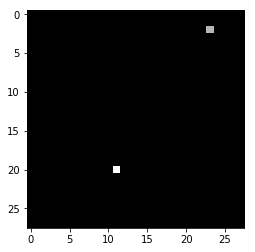

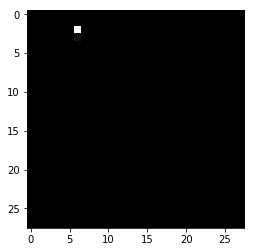

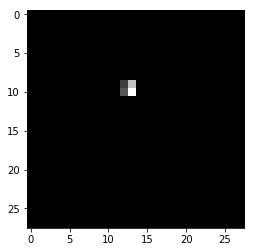

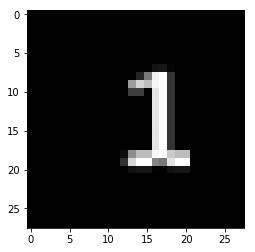

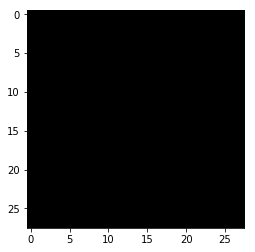

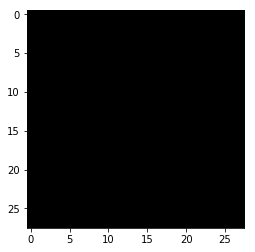

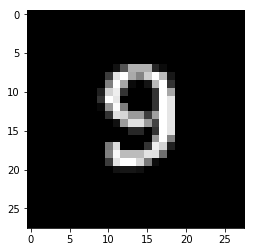

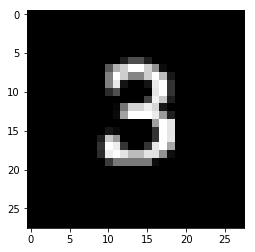

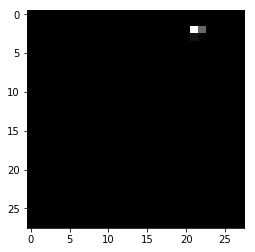

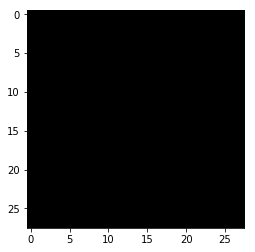

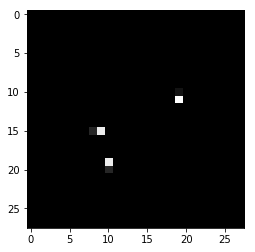

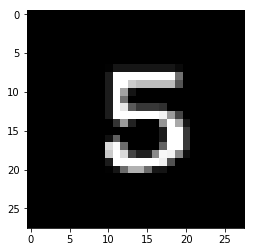

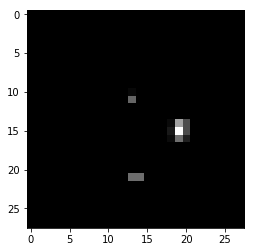

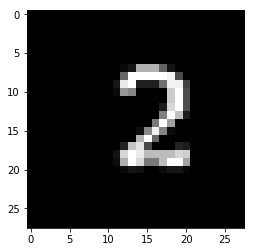

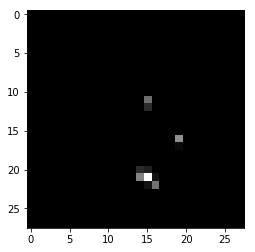

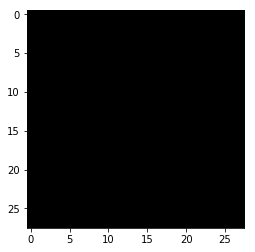

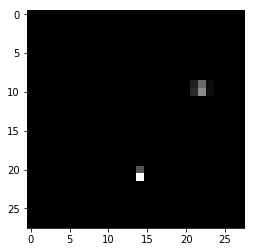

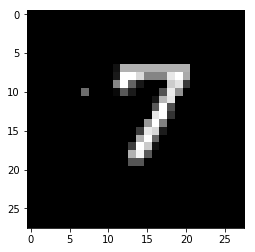

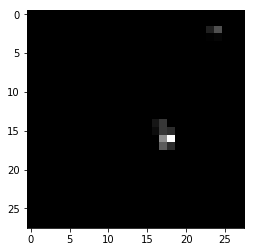

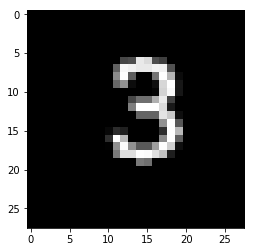

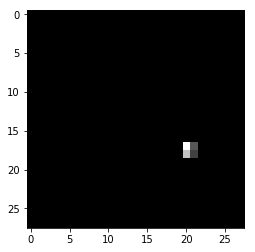

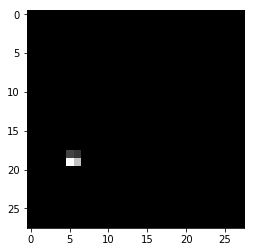

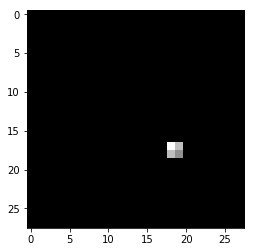

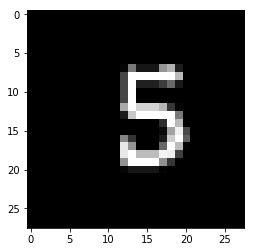

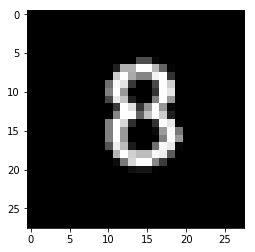

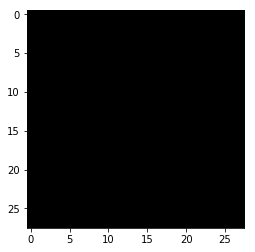

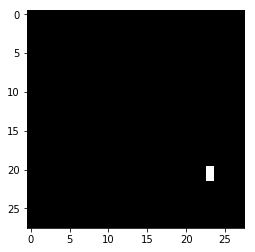

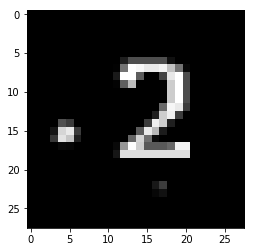

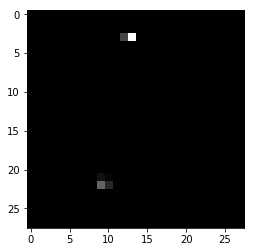

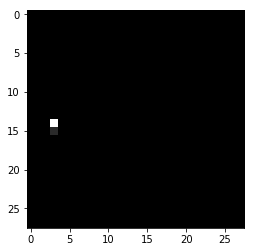

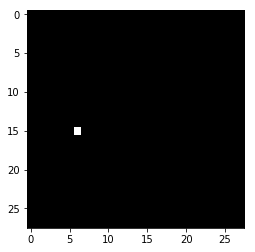

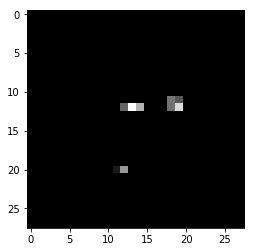

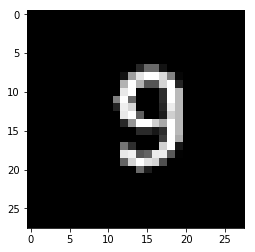

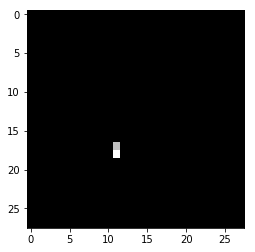

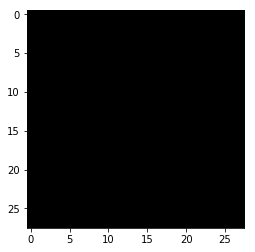

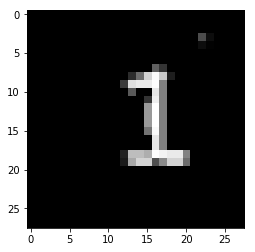

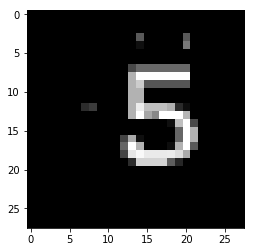

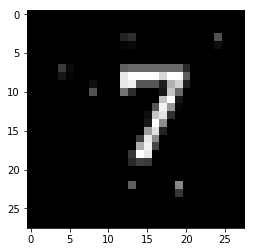

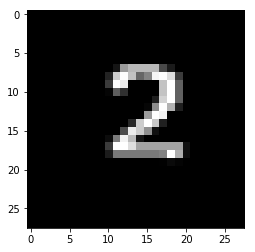

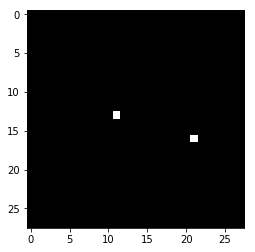

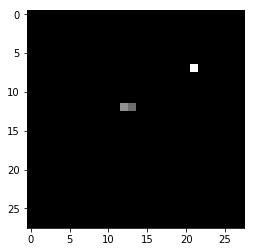

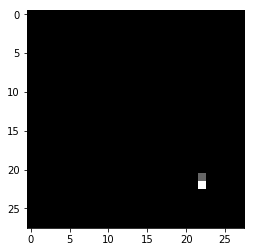

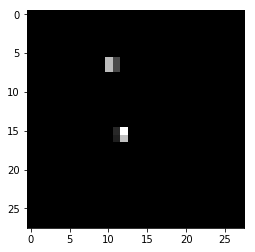

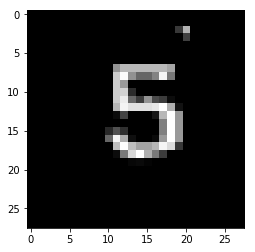

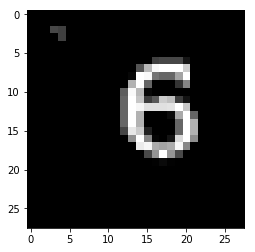

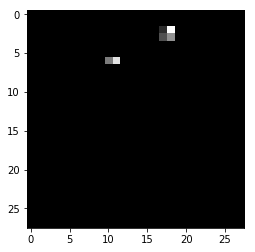

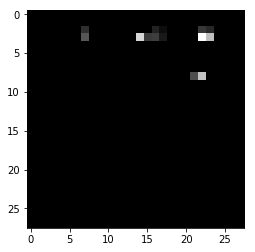

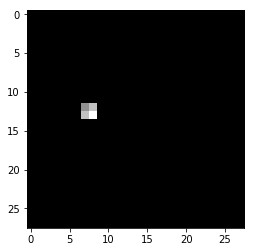

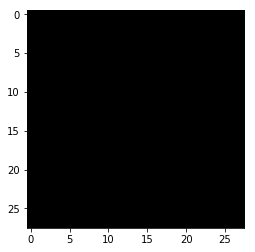

In [4]:
S = np.zeros((9, 9), dtype = 'uint8')
kk = 0
kernel = np.ones((1,1),np.uint8)

for i in range(0, 9):
    for j in range(0, 9):
        
        y1 = int(Points[j+i*10][1] + 4)
        y2 = int(Points[j+i*10 +10][1] + 4)
        
        x1 = int(Points[j+i*10][0] + 4)
        x2 = int(Points[j+i*10+1][0] - 4)
        kernel = np.ones((1,1),np.uint8)

        x = x1
        y = y1
        w = x2 - x1
        h = y2 - y1
        
        # cropped cell
        cropped_cell = im_th[y:y+h, x:x+w]
                
        #Region of Interest
        roi = cropped_cell
        # Resize the image
        roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
        
        if(cv2.contourArea(find_biggest_contour(roi)) < 10):
            S[i][j] = 0
        else:
            pass
        
        # Bottom
        roi[24:, :] = 0
        
        # Left
        roi[:, :3] = 0
        
        # Right
        roi[:, 25:] = 0
        
        #Top
        roi[:2, : ] = 0
        
        cv2.imwrite('./SudokuCells/cell_np'+str(i)+' '+str(j)+'.png', roi)      
        roi = roi.flatten()
        roi = roi[np.newaxis]
        plt.figure(kk)
        kk += 1
        plt.imshow(roi.reshape((28, 28)), cmap='gray')
        
        if S[i][j] is not 0:
            S[i][j] = model.predict_classes(roi,verbose=0)
print S
plt.show()